In [6]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

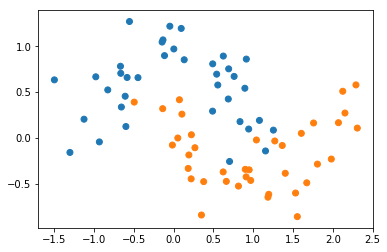

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))
xlim = plt.xlim()
ylim = plt.ylim()

In [8]:
xs = np.linspace(xlim[0], xlim[1], 1000)
ys = np.linspace(ylim[0], ylim[1], 1000)
xx, yy = np.meshgrid(xs, ys)
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.84


(-0.9822983882848756, 1.391851119202332)

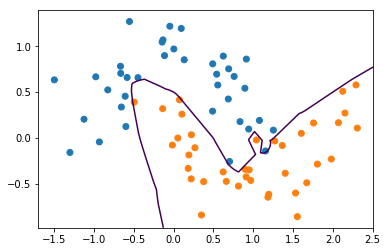

In [10]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

1.0
0.84
1.0
0.84
1.0
0.88
1.0
0.84
0.9866666666666667
0.88
1.0
0.92
1.0
0.84
0.9733333333333334
0.92
1.0
0.88


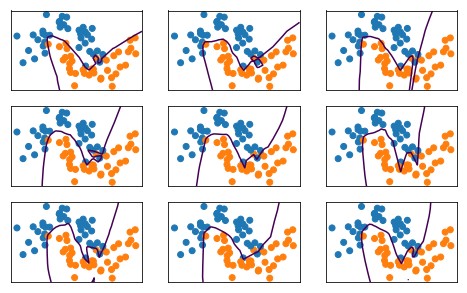

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(8, 5))
for ax, i in zip(axes.ravel(), range(10)):
    mlp = MLPClassifier(solver='lbfgs', random_state=i).fit(X_train, y_train)
    print(mlp.score(X_train, y_train))
    print(mlp.score(X_test, y_test))

    ax.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(())
    ax.set_yticks(())

In [12]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9733333333333334
0.84


(-0.9822983882848756, 1.391851119202332)

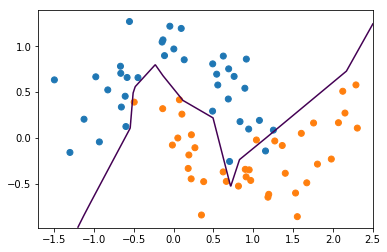

In [13]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

In [14]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), activation="tanh", random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.88


(-0.9822983882848756, 1.391851119202332)

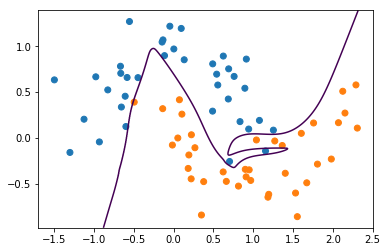

In [15]:
plt.contour(xx, yy, mlp.predict_proba(X_grid)[:, 1].reshape(xx.shape), levels=[.5])
plt.scatter(X_train[:, 0], X_train[:, 1], c=plt.cm.Vega10(y_train))

plt.xlim(xlim)
plt.ylim(ylim)

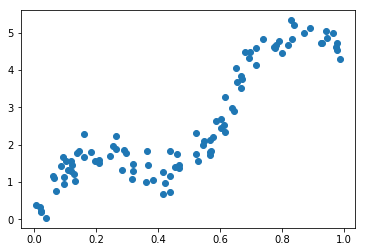

In [16]:
rng = np.random.RandomState(0)
x = np.sort(rng.uniform(size=100))
y = np.sin(10 * x) + 5 * x + np.random.normal(0, .3, size=100)
plt.plot(x, y, 'o')

In [17]:
line = np.linspace(0, 1, 100)
X = x.reshape(-1, 1)

In [18]:
from sklearn.neural_network import MLPRegressor
mlp_relu = MLPRegressor(solver="lbfgs").fit(X, y)
mlp_tanh = MLPRegressor(solver="lbfgs", activation='tanh').fit(X, y)

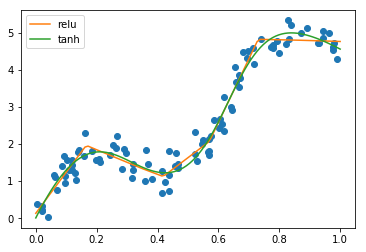

In [19]:
plt.plot(x, y, 'o')
plt.plot(line, mlp_relu.predict(line.reshape(-1, 1)), label="relu")
plt.plot(line, mlp_tanh.predict(line.reshape(-1, 1)), label="tanh")
plt.legend()

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data / 16., digits.target, stratify=digits.target, random_state=0)

In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

1.0
0.98


In [22]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=0)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
mlp = MLPClassifier(max_iter=1000, random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [25]:
mlp = MLPClassifier(solver="lbfgs", random_state=1).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

1.0
0.958041958041958


In [26]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

In [27]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__alpha': array([   0.001,    0.01 ,    0.1  ,    1.   ,   10.   ,  100.   ,
       1000.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__alpha",
                          values=["mean_test_score", "mean_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

In [29]:
res

,mean_test_score,mean_train_score
param_mlpclassifier__alpha,,
0.001,0.978873,1.000000
0.010,0.981221,1.000000
0.100,0.971831,1.000000
1.000,0.978873,0.999412
10.000,0.983568,0.990612
100.000,0.938967,0.945427
1000.000,0.626761,0.626761


(0.95, 1.01)

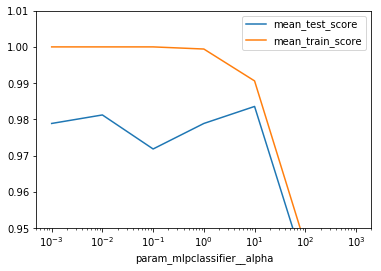

In [30]:
res.plot()
plt.xscale("log")
plt.ylim(0.95, 1.01)

In [31]:
res = results.pivot_table(index="param_mlpclassifier__alpha", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

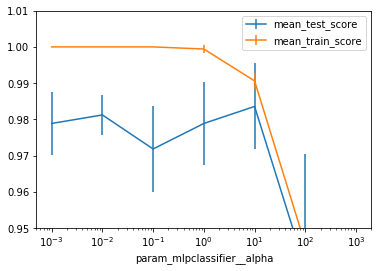

In [32]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.xscale("log")
plt.ylim(0.95, 1.01)
plt.legend()

In [33]:
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]
             }
grid = GridSearchCV(pipe, param_grid, cv=5)

In [34]:
grid.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (100,), (500,), (10, 10), (50, 50), (100, 100), (500, 500)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/andy/checkout/scikit-learn/sklearn/utils/deprecation.py:122: FutureWarning: You a

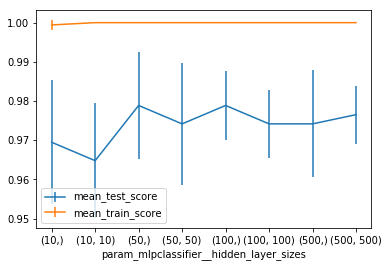

In [36]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), MLPClassifier(solver="lbfgs", random_state=1))
param_grid = {'mlpclassifier__hidden_layer_sizes':
              [(10,), (25,), (50,), (100,) , (10, 10), (25, 25), (50, 50)]
             }
grid = GridSearchCV(pipe, param_grid, return_train_score=True)

In [50]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'mlpclassifier__hidden_layer_sizes': [(10,), (25,), (50,), (100,), (10, 10), (25, 25), (50, 50)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
results = pd.DataFrame(grid.cv_results_)
res = results.pivot_table(index="param_mlpclassifier__hidden_layer_sizes", values=["mean_test_score", "mean_train_score", "std_test_score", "std_train_score"])

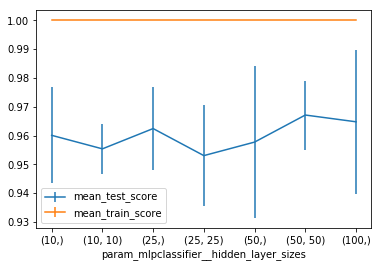

In [52]:
res.mean_test_score.plot(yerr=res.std_test_score)
res.mean_train_score.plot(yerr=res.std_train_score)
plt.legend()

In [53]:
mlp = MLPClassifier(solver="lbfgs", hidden_layer_sizes=(2,), random_state=0).fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9976525821596244
0.958041958041958


In [54]:
mlp.coefs_[0].shape

(30, 2)

In [55]:
hidden = np.maximum(0, np.dot(X_test_scaled, mlp.coefs_[0]) + mlp.intercepts_[0])
hidden = np.dot(X_test_scaled, mlp.coefs_[0])  + mlp.intercepts_[0]

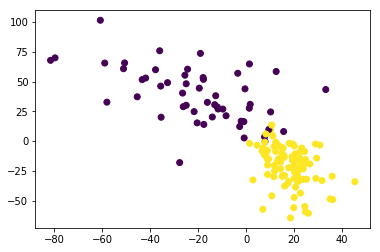

In [56]:
plt.scatter(hidden[:, 0], hidden[:, 1], c=y_test)

In [57]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.958041958041958

# Beyond scikit-learn

In [46]:
class NeuralNetwork(object):
    def __init__(self):
        # initialize coefficients and biases
        pass
    def forward(self, x):
        activation = x
        for coef, bias in zip(self.coef_, self.bias_):
            activation = self.nonlinearity(np.dot(activation, coef) + bias)
        return activation
    def backward(self, x):
        # compute gradient of stuff in forward pass
        pass

In [47]:
# http://mxnet.io/architecture/program_model.html
class array(object) :
    """Simple Array object that support autodiff."""
    def __init__(self, value, name=None):
        self.value = value
        if name:
            self.grad = lambda g : {name : g}

    def __add__(self, other):
        assert isinstance(other, int)
        ret = array(self.value + other)
        ret.grad = lambda g : self.grad(g)
        return ret

    def __mul__(self, other):
        assert isinstance(other, array)
        ret = array(self.value * other.value)
        def grad(g):
            x = self.grad(g * other.value)
            x.update(other.grad(g * self.value))
            return x
        ret.grad = grad
        return ret

In [48]:
# some examples
a = array(np.array([1, 2]), 'a')
b = array(np.array([3, 4]), 'b')
c = b * a
d = c + 1
print(d.value)
print(d.grad(1))

[4 9]
{'b': array([1, 2]), 'a': array([3, 4])}
